In [1]:
# preprocessing_iris.py
"""
Task 1: Data Preprocessing and Exploration
Dataset: Iris (from scikit-learn)
Tasks: Load, preprocess, explore, split
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

print("=== Task 1: Iris Data Preprocessing & Exploration ===\n")

# --- 1. LOAD DATA ---
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(f"Dataset shape: {df.shape} → {df.shape[0]} samples, {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())

=== Task 1: Iris Data Preprocessing & Exploration ===

Dataset shape: (150, 6) → 150 samples, 6 columns

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [2]:
# --- 2. PREPROCESS ---
print("\n=== PREPROCESSING ===")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Normalize features using Min-Max scaling
print("\nNormalizing features (Min-Max Scaling)...")
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
df_scaled['species'] = df['species']  # Keep numeric label
df_scaled['species_name'] = df['species_name']  # Keep name

print("Features scaled to range [0, 1]")

# Optional: One-hot encode species (for some models)
df_encoded = pd.get_dummies(df_scaled, columns=['species_name'], prefix='species')
print("One-hot encoding applied (optional for future use)")


=== PREPROCESSING ===
Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

Normalizing features (Min-Max Scaling)...
Features scaled to range [0, 1]
One-hot encoding applied (optional for future use)



=== EXPLORATORY DATA ANALYSIS ===

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Generating pair

<Figure size 1000x600 with 0 Axes>

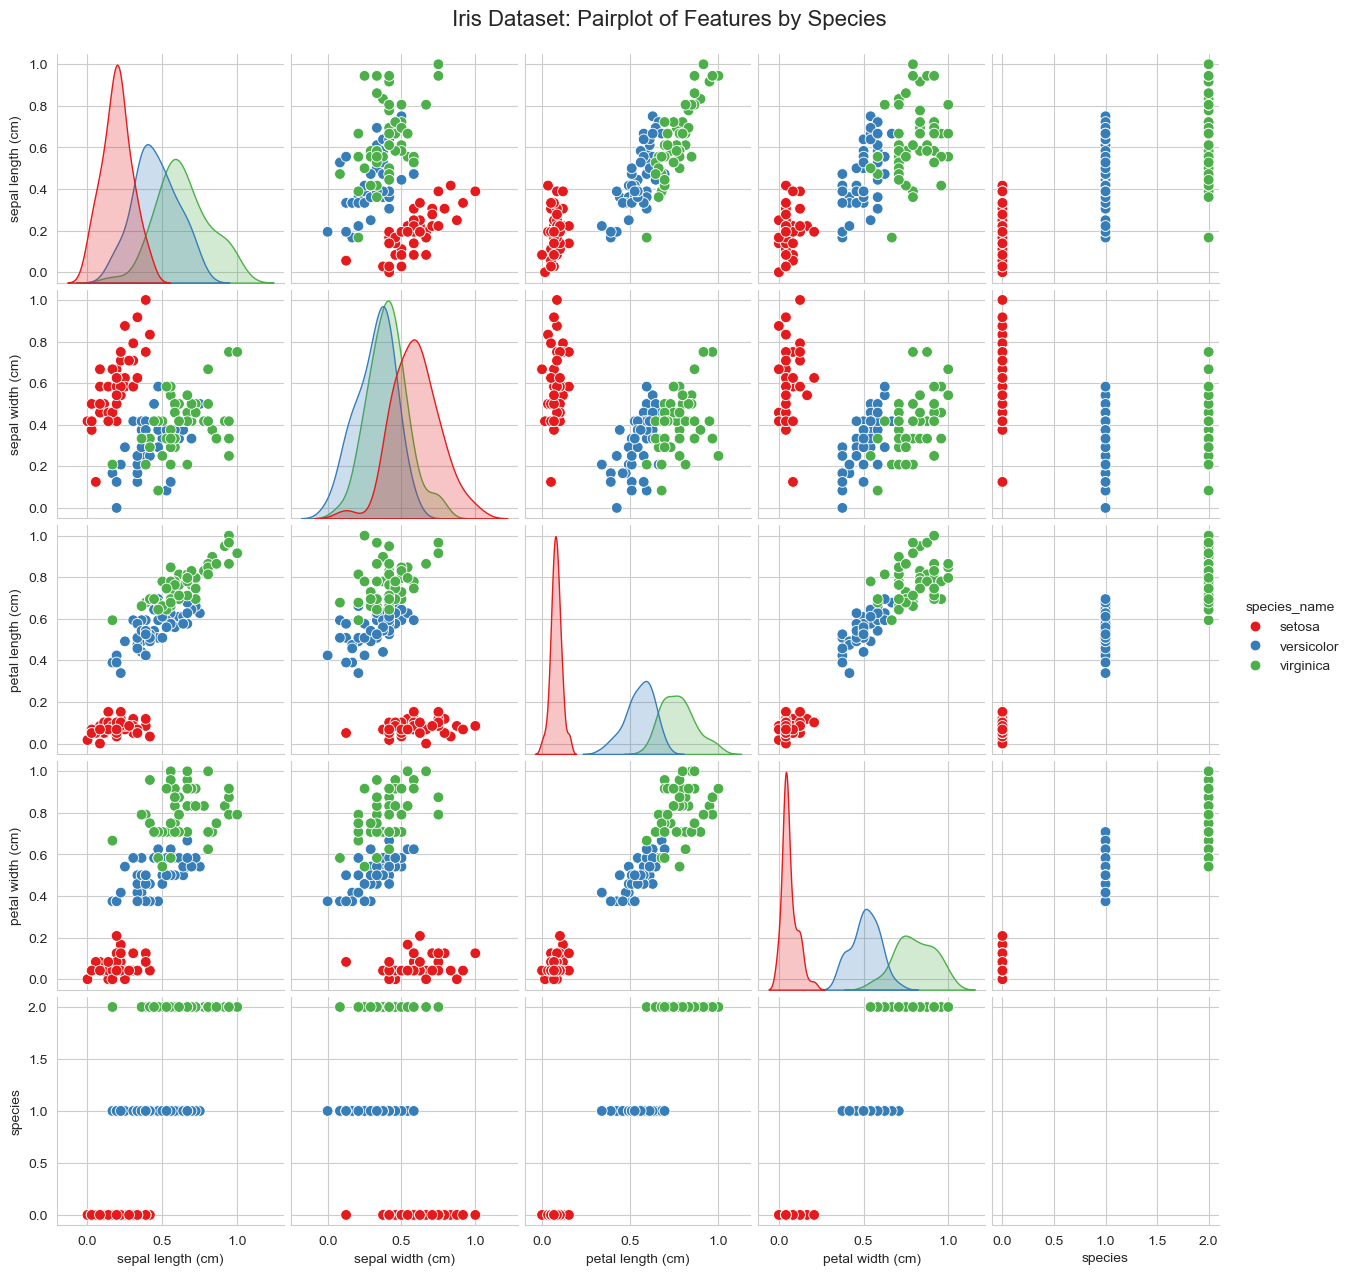

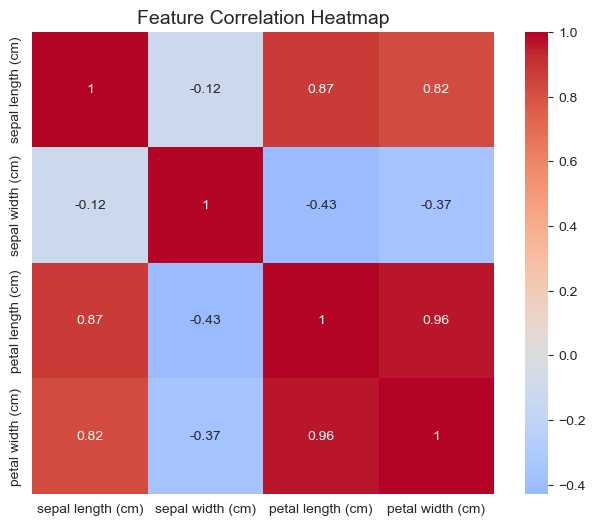

<Figure size 1000x600 with 0 Axes>

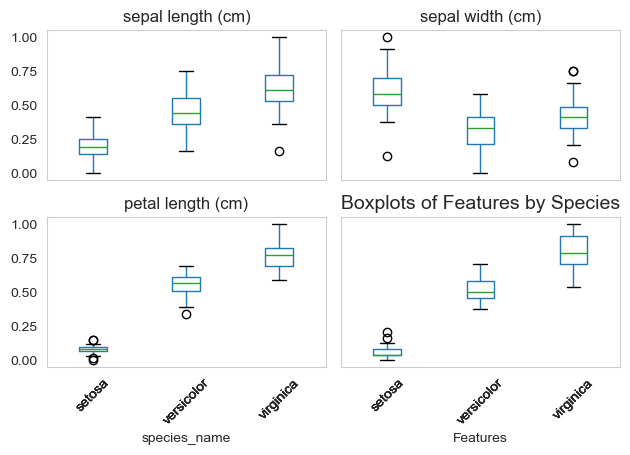

In [4]:
# --- 3. EXPLORE ---
print("\n=== EXPLORATORY DATA ANALYSIS ===")

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Set style for better visuals
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Pairplot
print("\nGenerating pairplot...")
sns.pairplot(df_scaled, hue='species_name', palette='Set1', plot_kws={'s': 60})
plt.suptitle("Iris Dataset: Pairplot of Features by Species", y=1.02, fontsize=16)
plt.savefig('visualizations/pairplot_iris.png', dpi=150, bbox_inches='tight')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation = df_scaled.iloc[:, :-2].corr()  # Only numeric features
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square=True)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.savefig('visualizations/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(10, 6))
df_scaled.boxplot(by='species_name', column=iris.feature_names, grid=False, rot=45)
plt.suptitle("")  # Remove default title
plt.title("Boxplots of Features by Species", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Normalized Value")
plt.tight_layout()
plt.savefig('visualizations/boxplots_iris.png', dpi=150, bbox_inches='tight')
plt.show()